In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import csv
import requests
from io import StringIO
import dateutil.parser

In [2]:
# Call Amberdata's awesome API to get some crypto market data!

def get_data(exchange, symbol, startDate, endDate):
    try:
        url = "https://web3api.io/api/v2/market/ohlcv/"+symbol+"/historical"
        querystring = {"exchange":exchange,"timeInterval":"days","timeFormat":"iso","format":"csv","fields":"timestamp,open,high,low,close,volume","startDate": startDate,"endDate": endDate}
        #print(url, querystring)
        headers = {'x-api-key': 'YOUR_API_KEY'}
        response = requests.request("GET", url, headers=headers, params=querystring)
        return (response.text)
    
    except Exception as e:
        raise e

In [3]:
# Read market data from the get_data() function
# Start date: 1555545599	Wednesday, April 17, 2019 11:59:59 PM
# End of day: 1587167999	Friday, April 17, 2020 11:59:59 PM

btc = pd.read_csv(StringIO(get_data("gdax","btc_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
eth = pd.read_csv(StringIO(get_data("gdax","eth_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
xrp = pd.read_csv(StringIO(get_data("gdax","xrp_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
bch = pd.read_csv(StringIO(get_data("gdax","bch_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
link = pd.read_csv(StringIO(get_data("gdax","link_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
ltc = pd.read_csv(StringIO(get_data("gdax","ltc_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
eos = pd.read_csv(StringIO(get_data("gdax","eos_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
xtz = pd.read_csv(StringIO(get_data("gdax","xtz_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
xlm = pd.read_csv(StringIO(get_data("gdax","xlm_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)
dash = pd.read_csv(StringIO(get_data("gdax","dash_usd","1555545599","1587167999")),index_col='timestamp',parse_dates=True)

In [4]:
btc.tail()

,open,high,low,close,volume
timestamp,,,,,
2020-04-13,6908.12,6908.13,6555.00,6861.21,22323.766617
2020-04-14,6860.51,6997.38,6771.41,6877.37,12868.606164
2020-04-15,6876.92,6940.00,6605.89,6624.12,14753.813610
2020-04-16,6623.62,7217.27,6456.00,7112.64,28117.557075
2020-04-17,7114.76,7156.66,7000.00,7037.46,13514.576441


In [5]:
# Name the assets so we can call them by name
btc.name ="BTC"
eth.name ="ETH"
xrp.name ="XRP"
bch.name ="BCH"
link.name ="LINK"
ltc.name ="LTC"
eos.name ="EOS"
xtz.name ="XTZ"
xlm.name ="XLM"
dash.name ="DASH"

In [6]:
# Create a portfolio using the close

da = pd.concat([btc['close'],eth['close'],xrp['close'],bch['close'],link['close'],ltc['close'],eos['close'],xtz['close'],xlm['close'],dash['close']],axis=1)
da.columns = [btc.name, eth.name, xrp.name, link.name, bch.name, ltc.name, eos.name, xtz.name, xlm.name, dash.name]

In [7]:
da.tail()

,BTC,ETH,XRP,LINK,BCH,LTC,EOS,XTZ,XLM,DASH
timestamp,,,,,,,,,,
2020-04-13,6861.21,156.76,0.1883,224.42,3.38310,41.37,2.448,1.9425,0.048292,73.479
2020-04-14,6877.37,158.65,0.1865,223.41,3.25000,41.22,2.469,1.9477,0.048140,72.354
2020-04-15,6624.12,152.77,0.1807,215.16,3.12482,39.30,2.401,1.9024,0.046187,70.654
2020-04-16,7112.64,172.55,0.1908,235.19,3.48600,42.60,2.661,2.0959,0.049247,76.233
2020-04-17,7037.46,170.89,0.1888,232.23,3.45138,42.21,2.615,2.0900,0.048665,76.571


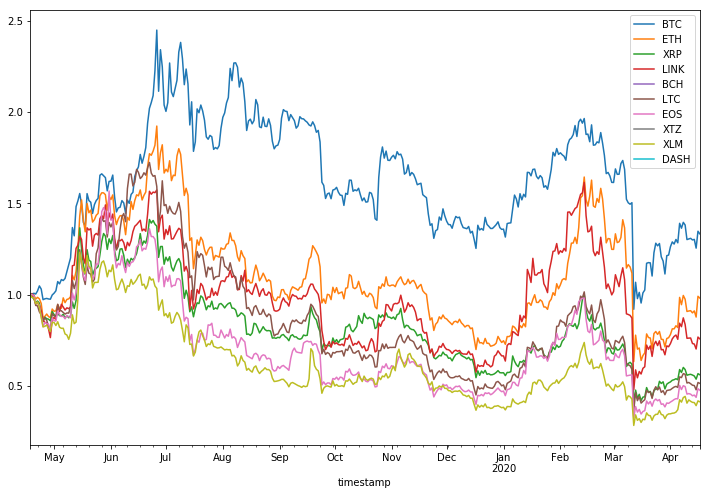

In [158]:
#Normalized returns

da_normed = da/da.iloc[0]
da_normed.plot(figsize=(12,8))

In [8]:
# How correlated is the price movement in are our assets?
da.pct_change(1).corr()

,BTC,ETH,XRP,LINK,BCH,LTC,EOS,XTZ,XLM,DASH
BTC,1.000000,0.867710,0.758390,0.843248,0.635737,0.811942,0.806619,0.691618,0.697663,0.658045
ETH,0.867710,1.000000,0.860481,0.863791,0.688088,0.884508,0.882626,0.725334,0.817946,0.675292
XRP,0.758390,0.860481,1.000000,0.799748,0.647810,0.819980,0.834477,0.653009,0.870851,0.632941
LINK,0.843248,0.863791,0.799748,1.000000,0.607973,0.857645,0.863038,0.628095,0.741548,0.666859
BCH,0.635737,0.688088,0.647810,0.607973,1.000000,0.666027,0.622969,0.633394,0.634130,0.528436
LTC,0.811942,0.884508,0.819980,0.857645,0.666027,1.000000,0.887046,0.677255,0.801567,0.682937
EOS,0.806619,0.882626,0.834477,0.863038,0.622969,0.887046,1.000000,0.638618,0.774999,0.669258
XTZ,0.691618,0.725334,0.653009,0.628095,0.633394,0.677255,0.638618,1.000000,0.589593,0.511293
XLM,0.697663,0.817946,0.870851,0.741548,0.634130,0.801567,0.774999,0.589593,1.000000,0.579534
DASH,0.658045,0.675292,0.632941,0.666859,0.528436,0.682937,0.669258,0.511293,0.579534,1.000000


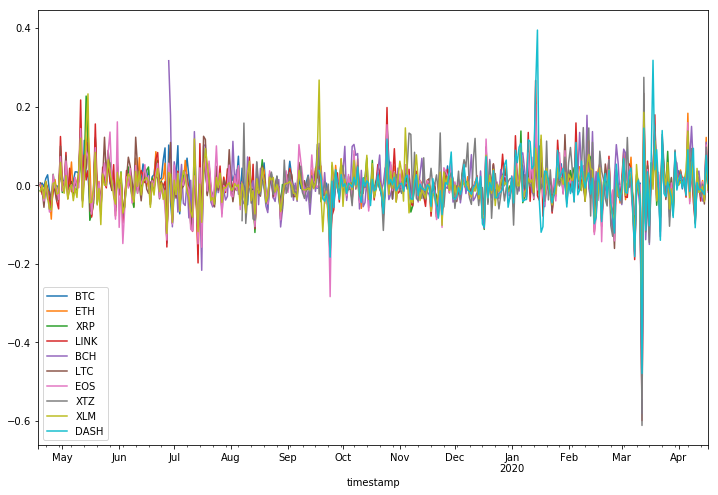

In [168]:
# Calculate our log normalized returns to make it easy to compare

log_returns = np.log(da/da.shift(1))
log_returns.plot(figsize=(12,8))

In [172]:
# What were the risk-adjusted returns as measured by Sharpe Ratio on our equally allocated portfolio?

# Normalize allocations so they sum to 1
allocation = np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])
print("Allocations", allocation)

# Calculate our Portfolios expected return
expected_return = np.sum(log_returns.mean() * allocation) *365
print("Expected Return", expected_return)

exp_volatility = np.sqrt(np.dot(allocation.T, np.dot(log_returns.cov() * 365, allocation)))
print("Expected Volatility", exp_volatility)

# Sharpe Ratio
sharpe_ratio = expected_return/exp_volatility
print("Sharpe Ratio", sharpe_ratio)

Allocations [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
Expected Return -0.22423453060741244
Expected Volatility 1.0033000031
Sharpe Ratio -0.223496989848


In [27]:
# Test run before I break things

# Set a seed for random number generation
np.random.seed(9)

# Generate some random numbers
rand_number = np.array(np.random.rand(10))

# Asset column names
print("Digital Assets", da.columns)

# Normalize allocations so they sum to 1
allocation = rand_number/np.sum(rand_number)
print("Allocations", allocation)

# Calculate our Portfolios expected return
expected_return = np.sum(log_returns.mean() * allocation) *365
print("Expected Return", expected_return)

exp_volatility = np.sqrt(np.dot(allocation.T, np.dot(log_returns.cov() * 365, allocation)))
print("Expected Volatility", exp_volatility)

# Sharpe Ratio
sharpe_ratio = expected_return/exp_volatility
print("Sharpe Ratio", sharpe_ratio)


Digital Assets Index(['BTC', 'ETH', 'XRP', 'LINK', 'BCH', 'LTC', 'EOS', 'XTZ', 'XLM', 'DASH'], dtype='object')
Allocations [ 0.00399207  0.19312607  0.19077823  0.05149886  0.05468568  0.08410344
  0.16104589  0.09547167  0.03234695  0.13295113]
Expected Return -0.30375862242707813
Expected Volatility 1.02183596181
Sharpe Ratio -0.297267500635


In [174]:
# Set a seed for random number generation
np.random.seed(9)

# Run 10,000 times
num_runs = 10000

all_allocations = np.zeros((num_runs,len(da.columns)))
return_arr = np.zeros(num_runs)
volatility_arr = np.zeros(num_runs)
sharpe_arr = np.zeros(num_runs)

for ind in range(num_runs):
    
    # Generate some random numbers
    rand_number = np.array(np.random.rand(10))
    
    # Normalize allocations so they sum to 1
    allocation = rand_number/np.sum(rand_number)

    # Save allocations
    all_allocations[ind,:] = allocation
    
    # Calculate our portfolios expected return
    return_arr[ind] = np.sum((log_returns.mean() * allocation) * 365)
    
    # Calculate expected volatility
    volatility_arr[ind] = np.sqrt(np.dot(allocation.T, np.dot(log_returns.cov() * 365, allocation)))

    # Calculate Sharpe ratio
    sharpe_arr[ind] = return_arr[ind]/volatility_arr[ind]

In [190]:
# What was my portfolio allocation where the sharpe ratio was the highest?
max_sharp_ret_loc = return_arr[sharpe_arr.argmax()]
max_sharp_vol_loc = volatility_arr[sharpe_arr.argmax()]

print("Max Sharpe Ratio", sharpe_arr.max())
print("Sharpe Ratio Arg Max:",sharpe_arr.argmax())
print("Portfolio Allocations at Max Sharpe Ratio:")
print("Digital Assets", da.columns)

all_allocations[sharpe_arr.argmax(),:]

Max Sharpe Ratio 0.154854605426
Sharpe Ratio Arg Max: 5228
Portfolio Allocations at Max Sharpe Ratio:
Digital Assets Index(['BTC', 'ETH', 'XRP', 'LINK', 'BCH', 'LTC', 'EOS', 'XTZ', 'XLM', 'DASH'], dtype='object')


array([ 0.17610299,  0.2397361 ,  0.01751047,  0.00158805,  0.20493669,
        0.03229229,  0.02195757,  0.21629659,  0.02961219,  0.05996707])

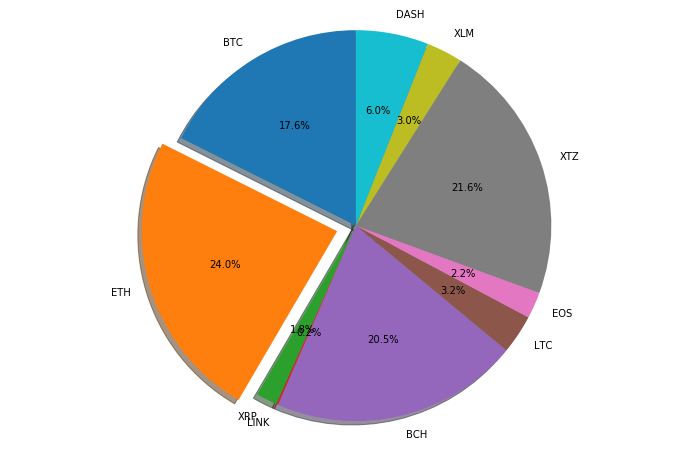

In [214]:
# Plot allocations in a Pie chart
labels = 'BTC', 'ETH', 'XRP', 'LINK', 'BCH', 'LTC', 'EOS', 'XTZ', 'XLM', 'DASH'
sizes = [0.17610299,  0.2397361 ,  0.01751047,  0.00158805,  0.20493669,
        0.03229229,  0.02195757,  0.21629659,  0.02961219,  0.05996707]
explode = (.0, .1, .0, .0, .0, .0, .0, .0, .0, .0)

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

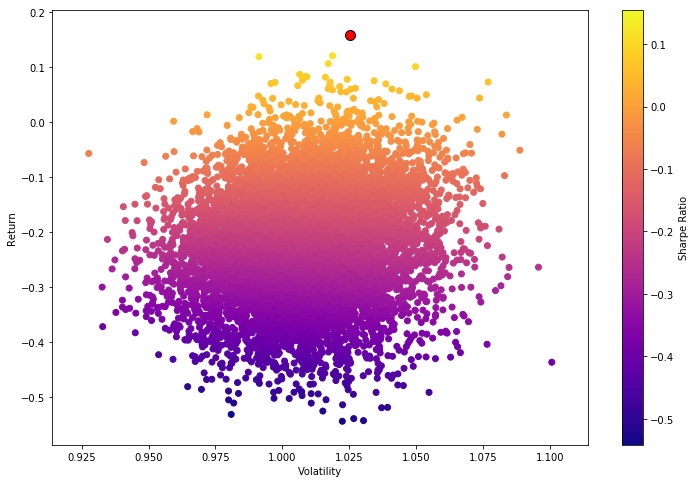

In [215]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max Sharp ratio
plt.scatter(max_sharp_vol_loc,max_sharp_ret_loc,c='red',s=100,edgecolors='black')